# M2P07 - Regression Project

## Project Description 
This project analyzes information from containing rental prices for units in across Canada in 2024.

## Data Source
Dataset obtained from rentfaster.ca:
- https://www.rentfaster.ca/?utm_source=OOH&utm_medium=sign&utm_campaign=ca

The data dictionary can be found here:
- https://www.kaggle.com/datasets/sergiygavrylov/25000-canadian-rental-housing-market-june-2024

## Goal of the Analysis
Explore multiple regression models, in order to find a model that predicts the rental price most accurately.

## Analysis
### 1st Model applied - Linear Regression (Limited to a few columns, avoiding categorical columns)
- Price Mean is around 2156 CAD
- Error in the model around 617 CAD
- Error of 28% of the Mean value - significantly high the error.

### 2nd Model Applied - Linear Regression adding most categorical columns and Encoded Columns
- Price Mean is around 2156 CAD
- Error in the model around 500.41 CAD
- Error of 23% of the Mean value - Better than first model but yet high the error.

### 3rd Model Applied - Polynomial and then LASSO
- First step find the degree 1 was the best fit, because the 2nd is overfitting (means 1st degree is as the 2nd model)
- Then Applied LASSO - because LASSO helps to simplify the model and prevent overfitting.
- with LASSO found RMSE of 456,41 CAD less than the lineal regression in the 2nd model.

### Cross validation performed and at the end it was tested with the 2nd model.

## Result
###  2nd Model tested with Real Data from the Site rentfaster.ca
- Real Data - https://www.rentfaster.ca/on/toronto/rentals/apartment/1-bedroom/pet-friendly/560595?-RSYNC
- Original Rental Price  - 2,025.00 CAD
- Predicted Rental Price - 1,916.84 CAD
- the predicted data is around 109 CAD below de real price, means an error of 5.35%

---

## 1. Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the dataset into a pandas df

In [2]:
# Load data
df = pd.read_csv("canada_rent.csv")

## 3. Basic EDA

In [3]:
#checking null values, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [4]:
# Validation Null Values in the dataSet
df.isnull().sum()

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

In [5]:
# Handle missing values
df.dropna(subset=['address'], inplace=True)
df.dropna(subset=['lease_term'], inplace=True)
df.dropna(subset=['beds'], inplace=True)
df.dropna(subset=['baths'], inplace=True)
df.dropna(subset=['sq_feet'], inplace=True)
df.dropna(subset=['availability_date'], inplace=True)
df.dropna(subset=['smoking'], inplace=True)
df.dropna(subset=['cats'], inplace=True)
df.dropna(subset=['dogs'], inplace=True)

In [6]:
# Rechecking Null Values
df.isnull().sum()

rentfaster_id        0
city                 0
province             0
address              0
latitude             0
longitude            0
lease_term           0
type                 0
price                0
beds                 0
baths                0
sq_feet              0
link                 0
furnishing           0
availability_date    0
smoking              0
cats                 0
dogs                 0
dtype: int64

In [7]:
# Validating values and non values, also Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19337 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      19337 non-null  int64  
 1   city               19337 non-null  object 
 2   province           19337 non-null  object 
 3   address            19337 non-null  object 
 4   latitude           19337 non-null  float64
 5   longitude          19337 non-null  float64
 6   lease_term         19337 non-null  object 
 7   type               19337 non-null  object 
 8   price              19337 non-null  float64
 9   beds               19337 non-null  object 
 10  baths              19337 non-null  object 
 11  sq_feet            19337 non-null  object 
 12  link               19337 non-null  object 
 13  furnishing         19337 non-null  object 
 14  availability_date  19337 non-null  object 
 15  smoking            19337 non-null  object 
 16  cats               19337 no

In [8]:
# Dropping not important columns in the analysis
# rentfaster_id is and internal ID from the DataSet used in the system not important in the Analysis
# link is the URL of the site for each property to rent, not important in the Analysis
# Latitude and longitude will not be important, will analyze by Province and not exact location
df = df.drop('rentfaster_id', axis=1, errors='ignore') 
df = df.drop('latitude', axis=1, errors='ignore') 
df = df.drop('longitude', axis=1, errors='ignore') 
df = df.drop('link', axis=1, errors='ignore') 

In [9]:
# Recheck Dataset Columns after dropping a few
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19337 entries, 0 to 25770
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               19337 non-null  object 
 1   province           19337 non-null  object 
 2   address            19337 non-null  object 
 3   lease_term         19337 non-null  object 
 4   type               19337 non-null  object 
 5   price              19337 non-null  float64
 6   beds               19337 non-null  object 
 7   baths              19337 non-null  object 
 8   sq_feet            19337 non-null  object 
 9   furnishing         19337 non-null  object 
 10  availability_date  19337 non-null  object 
 11  smoking            19337 non-null  object 
 12  cats               19337 non-null  object 
 13  dogs               19337 non-null  object 
dtypes: float64(1), object(13)
memory usage: 2.2+ MB


In [10]:
df.head()

,city,province,address,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
0,Airdrie,Alberta,69 Gateway Dr NE,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,Unfurnished,Immediate,Non-Smoking,True,True
1,Airdrie,Alberta,69 Gateway Dr NE,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,Unfurnished,Immediate,Non-Smoking,True,True
2,Airdrie,Alberta,69 Gateway Dr NE,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,Unfurnished,Immediate,Non-Smoking,True,True
3,Airdrie,Alberta,69 Gateway Dr NE,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,Unfurnished,November 18,Non-Smoking,True,True
4,Airdrie,Alberta,69 Gateway Dr NE,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,Unfurnished,Immediate,Non-Smoking,True,True


In [11]:
df.tail()

,city,province,address,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
25766,Yorkton,Saskatchewan,18 Allanbrooke Dr,Long Term,Apartment,920.0,Studio,1,400,Unfurnished,Immediate,Non-Smoking,True,True
25767,Yorkton,Saskatchewan,18 Allanbrooke Dr,Long Term,Apartment,1450.0,3 Beds,1,810,Unfurnished,Immediate,Non-Smoking,True,True
25768,Yorkton,Saskatchewan,363 Northview Rd,Long Term,Apartment,1125.0,1 Bed,1,520,Unfurnished,Immediate,Non-Smoking,True,True
25769,Yorkton,Saskatchewan,363 Northview Rd,Long Term,Apartment,920.0,Studio,1,400,Unfurnished,Immediate,Non-Smoking,True,True
25770,Yorkton,Saskatchewan,363 Northview Rd,Long Term,Apartment,1285.0,2 Beds,1,700,Unfurnished,Immediate,Non-Smoking,True,True


## 4. Encoding Categorical Columns

will check and transform all categorical columns that will be needed in the analysis.

In [12]:
# Check availability_date column, the different content
df['availability_date'][:50]

0       Immediate
1       Immediate
2       Immediate
3     November 18
4       Immediate
5     November 18
6       Immediate
7       Immediate
8       Immediate
9       Immediate
10      Immediate
11      Immediate
15      Immediate
16      Immediate
17      Immediate
18      Immediate
19      Immediate
20      Immediate
21      Immediate
22      Immediate
23        July 01
24        July 01
25        July 01
26        July 01
27      Immediate
28        July 01
29      Immediate
30      Immediate
31      Immediate
37      Immediate
38      Immediate
39      Immediate
40      Immediate
43      Immediate
46      Immediate
53      Immediate
54      Immediate
55      Immediate
56      Immediate
57      Immediate
61      Immediate
65      Immediate
67      Immediate
68      Immediate
70      Immediate
72      Immediate
74        July 01
75      Immediate
76      Immediate
77      Immediate
Name: availability_date, dtype: object

In [13]:
# Generate new columna with booolean Data
# if the value in availability_date == "Inmediate" true if not I dont take the date... just that "False" value, to simplify de analysis
df['availability_date_bool'] = (df['availability_date'] == "Immediate").astype(int)

df['availability_date_bool'][:20]

0     1
1     1
2     1
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
Name: availability_date_bool, dtype: int32

In [14]:
# Checking null values in the new column
df['availability_date_bool'].isnull().sum()

0

In [15]:
# Drop the original column 'availability_date', keep the new one 'availability_date_bool'
df = df.drop('availability_date', axis=1, errors='ignore') 

In [16]:
# checking baths column values 
df['baths'][:20]

0     2.5
1     2.5
2     2.5
3     2.5
4     2.5
5     2.5
6     2.5
7       1
8       1
9       1
10      1
11      1
15      1
16    2.5
17      1
18      2
19    1.5
20    2.5
21      1
22      1
Name: baths, dtype: object

In [17]:
# Normalize all values to numeric, convert column to numerical
df['baths'] = pd.to_numeric(df['baths'], errors='coerce')

In [18]:
# Rechecking after columna converted to numerical
df['baths'][:20]

0     2.5
1     2.5
2     2.5
3     2.5
4     2.5
5     2.5
6     2.5
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
15    1.0
16    2.5
17    1.0
18    2.0
19    1.5
20    2.5
21    1.0
22    1.0
Name: baths, dtype: float64

In [19]:
#checking beds column values 
df['beds'][:20]

0     2 Beds
1     3 Beds
2     2 Beds
3     2 Beds
4     2 Beds
5     2 Beds
6     2 Beds
7     Studio
8      1 Bed
9     2 Beds
10    Studio
11    2 Beds
15    2 Beds
16    3 Beds
17     1 Bed
18    2 Beds
19    3 Beds
20    2 Beds
21     1 Bed
22     1 Bed
Name: beds, dtype: object

In [20]:
# Keep the values from beds columns and avoid chars "Bed" or "Beds"
df['beds'] = df['beds'].str.extract(r'(\d+)')  
df['beds'][:10]

0      2
1      3
2      2
3      2
4      2
5      2
6      2
7    NaN
8      1
9      2
Name: beds, dtype: object

In [21]:
# There are some NaN values where is "Studio" value
# Fill the NaN values with 0
df['beds'] = df['beds'].fillna(0)
# Convert the column to numeric 
df['beds'] = pd.to_numeric(df['beds'], errors='coerce')
# Checking column values after convertion
df['beds'][:10]

0    2
1    3
2    2
3    2
4    2
5    2
6    2
7    0
8    1
9    2
Name: beds, dtype: int64

In [22]:
# Check null values in the column 'beds'
df['beds'].isnull().sum()

0

In [23]:
#checking sq_feet column values 
df['sq_feet'][:10]

0           1403
1           1496
2           1180
3           1403
4           1403
5           1403
6           1351
7    361 Sq. Ft.
8    525 Sq. Ft.
9    810 Sq. Ft.
Name: sq_feet, dtype: object

In [24]:
# standarizing the values of sq_feet column
df['sq_feet'] = df['sq_feet'].astype(str)
# Extract numeric values
df['sq_feet'] = df['sq_feet'].str.extract(r'(\d+)')  
# convert to numeric column
df['sq_feet'] = pd.to_numeric(df['sq_feet'], errors='coerce')
# Recheck values after conversion and dtype
df['sq_feet'][:10]

0    1403.0
1    1496.0
2    1180.0
3    1403.0
4    1403.0
5    1403.0
6    1351.0
7     361.0
8     525.0
9     810.0
Name: sq_feet, dtype: float64

In [25]:
# Check DataSet information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19337 entries, 0 to 25770
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19337 non-null  object 
 1   province                19337 non-null  object 
 2   address                 19337 non-null  object 
 3   lease_term              19337 non-null  object 
 4   type                    19337 non-null  object 
 5   price                   19337 non-null  float64
 6   beds                    19337 non-null  int64  
 7   baths                   19328 non-null  float64
 8   sq_feet                 19333 non-null  float64
 9   furnishing              19337 non-null  object 
 10  smoking                 19337 non-null  object 
 11  cats                    19337 non-null  object 
 12  dogs                    19337 non-null  object 
 13  availability_date_bool  19337 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(9

In [26]:
from sklearn.preprocessing import OneHotEncoder

# Encode of the categorical columns'furnishing', 'smoking', 'cats', 'dogs'
# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False)
encoded_cols = encoder.fit_transform(df[['furnishing', 'smoking', 'cats', 'dogs']])

# New dataset generated with the new columns encoded
new_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(['furnishing', 'smoking', 'cats', 'dogs']))

# check New dataset values
new_df.head()

,furnishing_Negotiable,furnishing_Unfurnished,"furnishing_Unfurnished, Negotiable",smoking_Non-Smoking,smoking_Smoke Free Building,smoking_Smoking Allowed,cats_True,dogs_True
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [27]:
# Drop original columns 'furnishing', 'smoking', 'cats', 'dogs' from the original dataset and join the new dataset columns
df = df.drop(columns=['furnishing', 'smoking', 'cats', 'dogs']).join(new_df)

# check Dataset values and columns
df.head()

,city,province,address,lease_term,type,price,beds,baths,sq_feet,availability_date_bool,furnishing_Negotiable,furnishing_Unfurnished,"furnishing_Unfurnished, Negotiable",smoking_Non-Smoking,smoking_Smoke Free Building,smoking_Smoking Allowed,cats_True,dogs_True
0,Airdrie,Alberta,69 Gateway Dr NE,Long Term,Townhouse,2495.0,2,2.5,1403.0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,Airdrie,Alberta,69 Gateway Dr NE,Long Term,Townhouse,2695.0,3,2.5,1496.0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,Airdrie,Alberta,69 Gateway Dr NE,Long Term,Townhouse,2295.0,2,2.5,1180.0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,Airdrie,Alberta,69 Gateway Dr NE,Long Term,Townhouse,2095.0,2,2.5,1403.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
4,Airdrie,Alberta,69 Gateway Dr NE,Long Term,Townhouse,2495.0,2,2.5,1403.0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [28]:
# Check Dataset types and values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19337 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   city                                19337 non-null  object 
 1   province                            19337 non-null  object 
 2   address                             19337 non-null  object 
 3   lease_term                          19337 non-null  object 
 4   type                                19337 non-null  object 
 5   price                               19337 non-null  float64
 6   beds                                19337 non-null  int64  
 7   baths                               19328 non-null  float64
 8   sq_feet                             19333 non-null  float64
 9   availability_date_bool              19337 non-null  int32  
 10  furnishing_Negotiable               15159 non-null  float64
 11  furnishing_Unfurnished              15159 non-

In [29]:
# Handle missing values
# Drop missing values in columns baths, sq_feet, furnishing_Negotiable
df.dropna(subset=['baths'], inplace=True)
df.dropna(subset=['sq_feet'], inplace=True)
df.dropna(subset=['furnishing_Negotiable'], inplace=True)

## 5. Data Visualization - Variables behaviour

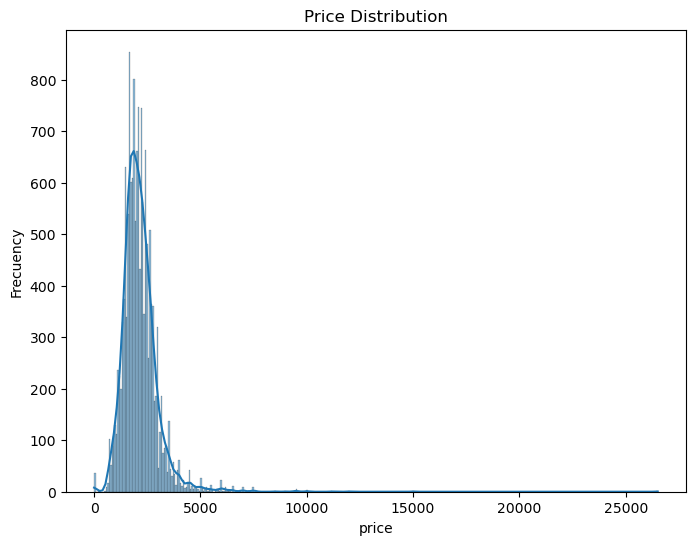

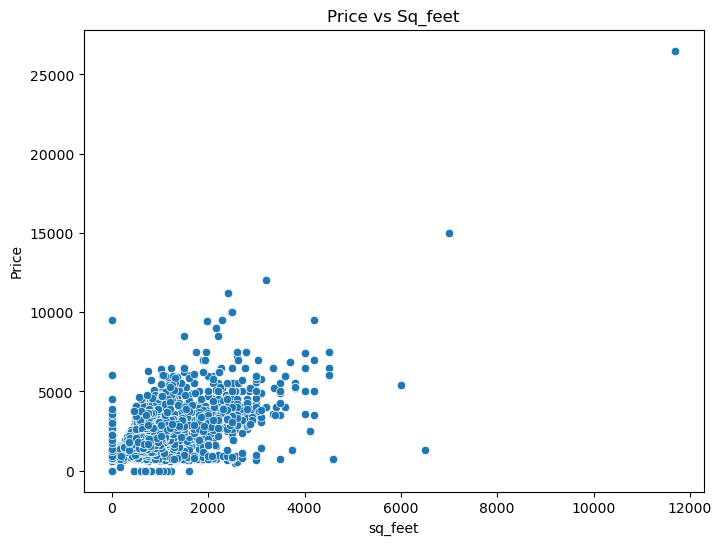

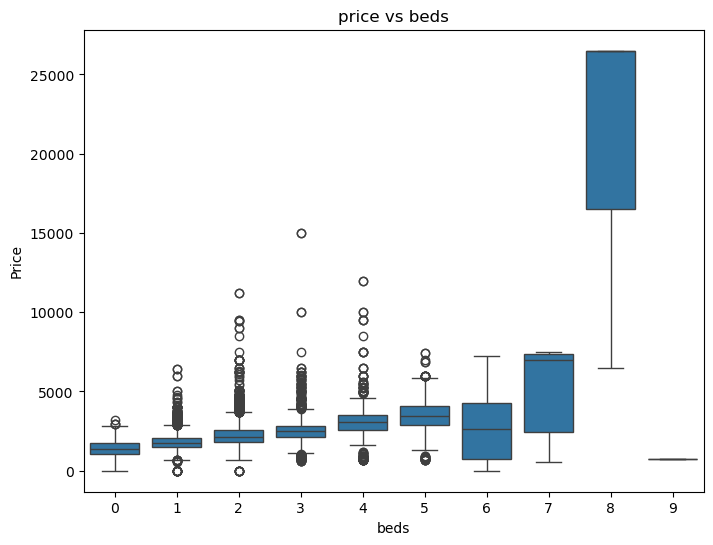

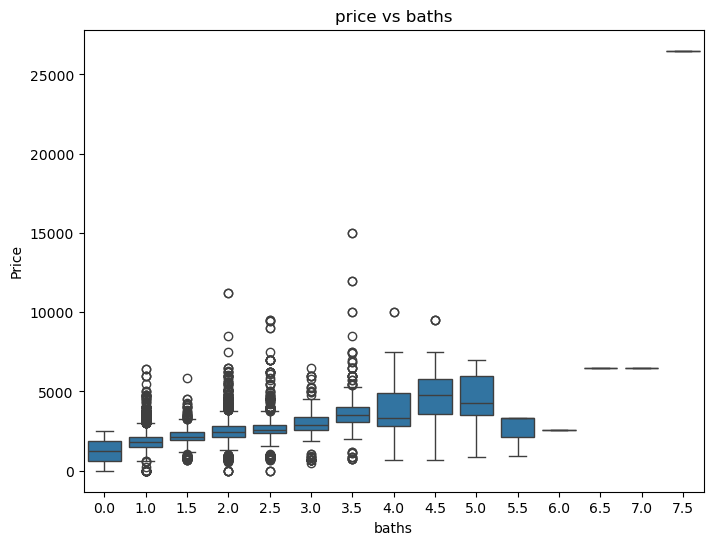

In [30]:
# Plot some variables and relations to understand a litlle bit more the behavior
#Price Distribution - Check most frequent in the market
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('price')
plt.ylabel('Frecuency')
plt.show()

# Scatter plot de price vs sq_feet
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sq_feet'], y=df['price'])
plt.title('Price vs Sq_feet')
plt.xlabel('sq_feet')
plt.ylabel('Price')
plt.show()

# Boxplot de price vs beds
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['beds'], y=df['price'])
plt.title('price vs beds')
plt.xlabel('beds')
plt.ylabel('Price')
plt.show()

# Boxplot de price vs baths
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['baths'], y=df['price'])
plt.title('price vs baths')
plt.xlabel('baths')
plt.ylabel('Price')
plt.show()

In [31]:
# create a new Dataset just with Price, beds, baths and sq_feet
# The idea is to analyze the correlation and create a tiny model
df_new = df[["price", "beds", "baths", "sq_feet"]] 

In [32]:
# Correlations between the variables
df_new.corr()

,price,beds,baths,sq_feet
price,1.000000,0.473268,0.561155,0.587839
beds,0.473268,1.000000,0.697795,0.702099
baths,0.561155,0.697795,1.000000,0.703189
sq_feet,0.587839,0.702099,0.703189,1.000000


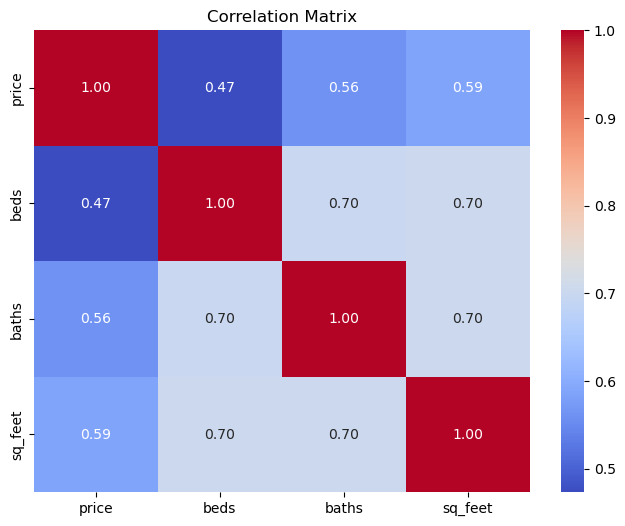

In [33]:
# PLOT - Correlation Matrix 
corr_matrix = df_new.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [34]:
#the strongest correlation in price would be sq_feet, the more sq_feet the more price would be, then Bath and finally beds.

In [35]:
# check if there is some null values in the DataSet
df_new.isnull().sum()

price      0
beds       0
baths      0
sq_feet    0
dtype: int64

In [36]:
# Separate features and target variable to start the train and the model later.
X1 = df_new.drop("price", axis=1)
y1 = df_new['price']

In [37]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.15, random_state=1)

In [38]:
# Create Traing Model #1

In [39]:
# LINEAR Regression
# Import model
from sklearn.linear_model import LinearRegression

# Create instance of model
mlr_model_1 = LinearRegression()

# Train model
mlr_model_1.fit(X_train, y_train)

LinearRegression()

In [40]:
# Obtain y hat values
y_pred = mlr_model_1.predict(X_test)

# Load metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Obtain metrics
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", str(RMSE))


MAE:  426.81628930479155
MSE:  380582.02651525947
RMSE:  616.9133055099877


In [41]:
# The RMSE in this case has a 616 CAD of error 

mean_price = df['price'].mean()
print("Mean Price is: ", mean_price)

Mean Price is:  2155.9917039677825


In [42]:
# Price Mean is around 2156 CAD
# Error in the model is about around 617 CAD
# would be and error of 28% of the Mean value, I think it is significantly high the error.
# The outliers value could be the reason

# I suggest to create separate models adding more categorical columns more realistic
# then check if the RMSE is less.

In [43]:
# I will add some categorical variables to improve the model

In [44]:
# Recheck Original Dataset structure and Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15147 entries, 0 to 19336
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   city                                15147 non-null  object 
 1   province                            15147 non-null  object 
 2   address                             15147 non-null  object 
 3   lease_term                          15147 non-null  object 
 4   type                                15147 non-null  object 
 5   price                               15147 non-null  float64
 6   beds                                15147 non-null  int64  
 7   baths                               15147 non-null  float64
 8   sq_feet                             15147 non-null  float64
 9   availability_date_bool              15147 non-null  int32  
 10  furnishing_Negotiable               15147 non-null  float64
 11  furnishing_Unfurnished              15147 non-

In [45]:
# I will add Province, City, lease_term to the model

In [46]:
#Encode de categorical columns
# Create instance of OneHotEncoder
##########################

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_cols = encoder.fit_transform(df[['province', 'lease_term', 'type']])

df_new_2 = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['province', 'lease_term', 'type'])).fillna(0) #Avoid NaN values

df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15147 entries, 0 to 15146
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   province_British Columbia           15147 non-null  float64
 1   province_Manitoba                   15147 non-null  float64
 2   province_New Brunswick              15147 non-null  float64
 3   province_Newfoundland and Labrador  15147 non-null  float64
 4   province_Northwest Territories      15147 non-null  float64
 5   province_Nova Scotia                15147 non-null  float64
 6   province_Ontario                    15147 non-null  float64
 7   lease_term_6 months                 15147 non-null  float64
 8   lease_term_Long Term                15147 non-null  float64
 9   lease_term_Negotiable               15147 non-null  float64
 10  lease_term_Short Term               15147 non-null  float64
 11  lease_term_months                   15147

In [47]:
df_new_2.index = df.index  

In [48]:
# Drop original Columns 'province', 'lease_term', 'type' and join the new columna from df_new_2
df = df.drop(columns=['province', 'lease_term', 'type']).join(df_new_2)

# Recheck Dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15147 entries, 0 to 19336
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   city                                15147 non-null  object 
 1   address                             15147 non-null  object 
 2   price                               15147 non-null  float64
 3   beds                                15147 non-null  int64  
 4   baths                               15147 non-null  float64
 5   sq_feet                             15147 non-null  float64
 6   availability_date_bool              15147 non-null  int32  
 7   furnishing_Negotiable               15147 non-null  float64
 8   furnishing_Unfurnished              15147 non-null  float64
 9   furnishing_Unfurnished, Negotiable  15147 non-null  float64
 10  smoking_Non-Smoking                 15147 non-null  float64
 11  smoking_Smoke Free Building         15147 non-

In [49]:
# Preparing 2nd Model Linear Regression with Categorical variables to check how it works
# Separate features and target variable

X2 = df.drop(["price", "city", "address"], axis=1) #Dropping Price City and Address
y2 = df['price']

In [50]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.15, random_state=1)

In [51]:
# Create Traing Model #2

In [52]:
# LINEAR Regression
# Import model
from sklearn.linear_model import LinearRegression

# Create instance of model
mlr_model_2 = LinearRegression()

# Train model
mlr_model_2.fit(X_train, y_train)

LinearRegression()

In [53]:
# Obtain y hat values
y_pred = mlr_model_2.predict(X_test)

In [54]:
# Load metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", str(RMSE))

MAE:  354.17248860060937
MSE:  250413.97306275807
RMSE:  500.4138018308029


In [55]:
# The RMSE in this case has a 500,41 CAD of error 

mean_price = df['price'].mean()
print("Mean Price is: ", mean_price)

Mean Price is:  2155.9917039677825


In [56]:
# Price Mean is around 2156 CAD
# Error in the model is about around 500.41 CAD
# would be and error of 23% of the Mean value, I think it is significantly high the error, it is better than the other model without the categorical
# variables added
# The outliers values could be the reason

In [57]:
# I will plot the residual values to understand a little bit more about why there is still error

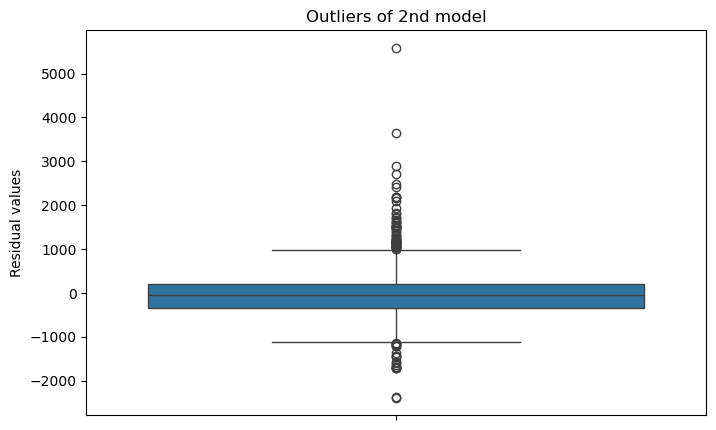

In [58]:
# Plot - Residual values
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.boxplot(y=residuals)
plt.title("Outliers of 2nd model")
plt.ylabel("Residual values")
plt.show()

In [59]:
#Average rental price (mean): 2156 CAD
#Root Mean Squared Error (RMSE): 500,41 CAD
#The RMSE of 500,41 indicates that on average the model has an error of + - 500 in predicting rental prices.
#However, the outliers have much larger residuals, in some cases exceeding 5000.

In [60]:
# I will check with the polinomial model and then will apply cross validation 
# why Cross-validation? to improve model evaluation by testing it on different subsets

In [61]:
#Polynomial - first I will check the best degree to use.. then I Will use the best model with the best degree to compare with the other models.

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Load and prepare the data
X2 = df.drop(["price", "city", "address"], axis=1)
y2 = df['price']

# List to save RMSE for training data
train_rmse_errors = []
# List to save RMSE for testing data
test_rmse_errors = []
# List to save degrees
degrees = []

# Loop over polynomial degrees
for d in range(1, 3):  # Compare polynomial degrees from 1 to 4
    # Create poly features for each degree "d"
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X2)
    
    # Split dataset into train/test split
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y2, test_size=0.15, random_state=1)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create and train the final model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Get predictions for both train and test data
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    # Calculate RMSE for training set
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
    
    # Calculate RMSE for testing set
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
    
    # Store errors and degrees to lists
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    degrees.append(d)

# Create df with RMSE scores + degrees
results_df = pd.DataFrame({
    'Degree': degrees,
    'Train RMSE': train_rmse_errors,
    'Test RMSE': test_rmse_errors
})


In [63]:
results_df

,Degree,Train RMSE,Test RMSE
0,1,598.204204,5.004138e+02
1,2,502.288347,2.870078e+14


In [64]:
# seems that the 2nd degree is doing an overfitting because the TEST RMSE is too high!!
# Degree 1 is the same as linear regression I did before with the same value 500, 41 CAD

In [65]:
# I will use LASSO - because LASSO helps to simplify the model and prevent overfitting.

In [66]:
# Import model

from sklearn.linear_model import LassoCV

# Create instance of model
lassocv_model = LassoCV(eps=0.01,n_alphas=200,cv=10)

# Fit the model on scaled_X_train
lassocv_model.fit(X_train_scaled, y_train)

lassocv_model.alpha_

# Evaluate lassocv model

y_pred = lassocv_model.predict(X_test_scaled)

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

#MAE, MSE, RMSE
print("LASSO MAE: ", mean_absolute_error(y_test, y_pred))
print("LASSO MSE: ", mean_squared_error(y_test, y_pred))
print("LASSO RMSE: ", str(RMSE))


LASSO MAE:  318.1948043559872
LASSO MSE:  208315.66201201605
LASSO RMSE:  456.4161062145113


In [67]:
# Seems that with Lasso I got a RMSE of 456,41 CAD less than the lineal regression in the 2nd model
# The application of Lasso has demostrate to control complexity by keeping only the most important terms, 
# improving performance on the test set

In [68]:
# I will use cross validation for all the models I used
# Why Cross-validation? 
# it helps to evaluate the model's performance more reliably by splitting the data into multiple subsets (folds) 
# and training the model on different parts of the data. 
# It gives a better understanding of how the model will generalize to unseen data.

In [69]:
from sklearn.model_selection import cross_validate

# I will avoid check 1st model, it was not accurate in values and data.

# 2nd model
# Perform cross-validation with 5 folds
scores = cross_validate(mlr_model_2, X_train_scaled, y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)

print("Second MODEL Cross Validation Results")
print("Cross-Validation Score:", pd.DataFrame(scores).mean())

Second MODEL Cross Validation Results
Cross-Validation Score: fit_time                        5.220843e-01
score_time                      6.130457e-03
test_neg_mean_absolute_error   -4.238922e+13
test_neg_mean_squared_error    -9.710530e+30
test_max_error                 -8.781472e+16
dtype: float64


In [70]:
# 3rd model - LASSO
# Perform cross-validation with 5 folds
scores = cross_validate(lassocv_model, X_train_scaled, y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)

print("Third MODEL (LASSO) Cross Validation Results")
print("Cross-Validation Score:", pd.DataFrame(scores).mean())


Third MODEL (LASSO) Cross Validation Results
Cross-Validation Score: fit_time                             7.293247
score_time                           0.006911
test_neg_mean_absolute_error      -341.707873
test_neg_mean_squared_error    -286725.114318
test_max_error                   -6598.438075
dtype: float64


In [72]:
# Lasso Model - Cross Validation
# I can see that the MAE and Max error .. there is around 341.70 CAD error on average on each prediction and a maximum of 6598 CAD error found. 

In [73]:
# Finally will try to predict new Data with 2nd model, I would choose Lasso, but I have some issues, so will check it 
# with the 2nd model

In [74]:
#Source - https://www.rentfaster.ca/on/toronto/rentals/apartment/1-bedroom/pet-friendly/560595?-RSYNC
# Original Rental Price - 2,025.00 CAD

new_data = pd.DataFrame({
    'beds': [2],
    'baths': [1],
    'sq_feet': [418],
    'availability_date_bool': [0],  
    'furnishing_Negotiable': [0.0],
    'furnishing_Unfurnished': [1.0],
    'furnishing_Unfurnished, Negotiable': [0.0],
    'smoking_Non-Smoking': [1.0],
    'smoking_Smoke Free Building': [0.0],
    'smoking_Smoking Allowed': [0.0],
    'cats_True': [1.0],
    'dogs_True': [1.0],
    'province_British Columbia': [0.0],
    'province_Manitoba': [0.0],
    'province_New Brunswick': [0.0],
    'province_Newfoundland and Labrador': [0.0],
    'province_Northwest Territories': [0.0],
    'province_Nova Scotia': [0.0],
    'province_Ontario': [1.0],  
    'lease_term_6 months': [0.0],
    'lease_term_Long Term': [1.0],
    'lease_term_Negotiable': [0.0],
    'lease_term_Short Term': [0.0],
    'lease_term_months': [0.0],  
    'type_Apartment': [1.0],
    'type_Basement': [0.0],
    'type_Condo Unit': [0.0],
    'type_Duplex': [0.0],
    'type_House': [0.0],
    'type_Loft': [0.0],
    'type_Main Floor': [0.0],
    'type_Mobile': [0.0],
    'type_Room For Rent': [0.0],
    'type_Townhouse': [0.0],
    'type_Vacation Home': [0.0]
})

In [75]:
# Will do it with the 2nd Model used.
predict_price = mlr_model_2.predict(new_data)  
print("Prediction Price: ", predict_price)

Prediction Price:  [1916.8493142]


In [ ]:
# Original Rental Price - 2,025.00 CAD and the Predict by the 2nd Model is around 109 CAD below de real price 
# And the error is less than expected.

# The End!